# Homework 12

## Due 4PM Nov 30, 2020

## Shariq M Jamil

## Problem 1: Women's 800 Meter

Which countries have done best at the Women's 800 Meter?

Gather the data from the World Records CSV, use a Dictionary to count the records, and create a bar chart showing the relative number of records per country.  Sort the countries alphabetically, and make sure we can read the country names.  

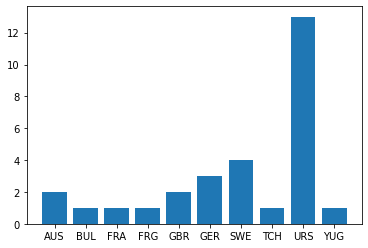

In [1]:
import csv
import matplotlib.pyplot as plt

with open('WorldRecords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    women_records = {}
    nationalities = []
    # iterate through file
    for row in csv_reader:
        if 'Womens 800m' in row[0]:
            # extract country 
            country = row[4]
            if country not in nationalities:
                # add country to nationalities list
                nationalities.append(country)
            # if country has already been seen, increment
            if country in women_records:
                women_records[country] += 1
            # new country, set to 1
            else:
                women_records[country] = 1
    # sort nationalities alphabetically
    nationalities.sort()
    records = []
    # add records by nation
    for nation in nationalities:
        records.append(women_records[nation])

# plot a bar chart using records (Y) and nationalities (X)
plt.bar(range(len(records)), list(records), align='center')
plt.xticks(range(len(nationalities)), list(nationalities))
plt.show()

## Problem 2: Regular Expressions

We have used Beautiful Soup to scrape a website.

Let's see what we can do with just urlib and Regular Expressions

Take the DCE website, and find all the links.  (Be sure to compare notes with Beautiful Soup)

In [2]:
import urllib.request
import re

def find_links(website):
    "Return a list of the links on this page: Use only urllib and Regular Expressions"
    with urllib.request.urlopen(website) as f:
        text = f.read().decode('utf-8')
        m = re.findall("(<a.*a>)", text, flags=re.MULTILINE)
        print(len(m))
        for link in m:
            print(link)
        return m
website = 'https://www.extension.harvard.edu'
find_links(website)

58
<a href="#main-menu" class="skip">Jump to navigation</a>
<a href="#main-content" class="skip">Skip to Main Content</a>
<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>
<a href="https://www.extension.harvard.edu">Harvard Extension School</a>
<a href="https://www.summer.harvard.edu">Harvard Summer School</a>
<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>
<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>
<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed href="">Menu</a>
<a href="/academics">Academics</a>
<a href="/registration-admissions" title="Registration &amp; Admissions">Registration &amp; Admissions</a>
<a href="/resources-policies">Resources &amp; Policies</a>
<a href="https://blog.dce.harvard.edu/extension" title="">Blog</a>
<a href="/request-information" title="">Get Info</a>
<a href="/about-us" title="">About</a>
<a href="/academic-calendar" title="">Calendar</a>
<a href="/compl

['<a href="#main-menu" class="skip">Jump to navigation</a>',
 '<a href="#main-content" class="skip">Skip to Main Content</a>',
 '<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>',
 '<a href="https://www.extension.harvard.edu">Harvard Extension School</a>',
 '<a href="https://www.summer.harvard.edu">Harvard Summer School</a>',
 '<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>',
 '<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>',
 '<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed href="">Menu</a>',
 '<a href="/academics">Academics</a>',
 '<a href="/registration-admissions" title="Registration &amp; Admissions">Registration &amp; Admissions</a>',
 '<a href="/resources-policies">Resources &amp; Policies</a>',
 '<a href="https://blog.dce.harvard.edu/extension" title="">Blog</a>',
 '<a href="/request-information" title="">Get Info</a>',
 '<a href="/about-us" title="">About</a>',
 '<a href="/a

## Unit Test

In [3]:
website = 'https://www.extension.harvard.edu'

In [4]:
results = find_links(website)
print(len(results))
for link in results:
    print(link)

58
<a href="#main-menu" class="skip">Jump to navigation</a>
<a href="#main-content" class="skip">Skip to Main Content</a>
<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>
<a href="https://www.extension.harvard.edu">Harvard Extension School</a>
<a href="https://www.summer.harvard.edu">Harvard Summer School</a>
<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>
<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>
<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed href="">Menu</a>
<a href="/academics">Academics</a>
<a href="/registration-admissions" title="Registration &amp; Admissions">Registration &amp; Admissions</a>
<a href="/resources-policies">Resources &amp; Policies</a>
<a href="https://blog.dce.harvard.edu/extension" title="">Blog</a>
<a href="/request-information" title="">Get Info</a>
<a href="/about-us" title="">About</a>
<a href="/academic-calendar" title="">Calendar</a>
<a href="/compl

## Compare your program with the results from Beautiful Soup

Do you get the same number of links?  If not:

1) How many do you miss?

2) Can you explain why you miss them?

3) Can you fix it?

## Problem 3: File Name Generator

Write a Generator that takes a directory, a file extension, and, optionally, a file size, and then yields a stream of tuples, (path, filename) so that path/filename is a legal path to a file that meets the conditions.

Use os.walk(dir) to create a generator that gives all files and directories below dir.  Call this generator, and yield files (not directories) with the right extension and a file size greater than the given size.   

We have three unit tests: demonstrate that you can walk recursivly through two or more directories, and that you can filter by file extension and filter by extension and by size. 

In [5]:
import os
# Find all files in the directory or below that end with the given extension and are larger than size
'''
I referenced and 'borrowed' code from
https://www.tutorialspoint.com/python/os_walk.htm
'''
def find_files_gen(directory, extension, size = 0):
    # copied for loop from tutorialspoint, it returns 
    # lists of files and directories in a given directory
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            # Construct path to file
            path = os.path.join(root, file_name)
            # if file has the right extension
            if os.path.isfile(path) and file_name.endswith(extension):
                # if file size is greater than given filesize
                if(os.path.getsize(path) > size):
                    # give path and file_name
                    yield (path, file_name)
        # call func recursively on any nested directories
        for name in dirs:
            find_files_gen(name, extension, size)

## Unit Test

In [6]:
# Show recursive search.  Make sure we can see at least two directories of files
gen = find_files_gen('..', 'py' )

for path, filename in gen:
    print(path, filename)

../Homework 5/walk.py walk.py
../Homework 5/Programs/Prog3.py Prog3.py
../Homework 5/Programs/Prog3 - Copy (15).py Prog3 - Copy (15).py
../Homework 5/Programs/Prog3 - Copy (8).py Prog3 - Copy (8).py
../Homework 5/Programs/Prog1.py Prog1.py
../Homework 5/Programs/Prog3 - Copy (10).py Prog3 - Copy (10).py
../Homework 5/Programs/Prog3 - Copy (7).py Prog3 - Copy (7).py
../Homework 5/Programs/Prog3 - Copy (16).py Prog3 - Copy (16).py
../Homework 5/Programs/Prog3 - Copy (19).py Prog3 - Copy (19).py
../Homework 5/Programs/Prog3 - Copy (12).py Prog3 - Copy (12).py
../Homework 5/Programs/Prog3 - Copy (17).py Prog3 - Copy (17).py
../Homework 5/Programs/Prog3 - Copy (13).py Prog3 - Copy (13).py
../Homework 5/Programs/Prog3 - Copy (18).py Prog3 - Copy (18).py
../Homework 5/Programs/Prog3 - Copy (14).py Prog3 - Copy (14).py
../Homework 5/Programs/Prog3 - Copy (2).py Prog3 - Copy (2).py
../Homework 5/Programs/Prog2.py Prog2.py
../Homework 5/Programs/Prog3 - Copy (4).py Prog3 - Copy (4).py
../Homewor

In [7]:
# Show all notebooks in this directory
gen = find_files_gen('.', '.ipynb')

for path, filename in gen:
    print(path, filename)

./Pickle.ipynb Pickle.ipynb
./Homework12.ipynb Homework12.ipynb
./Untitled.ipynb Untitled.ipynb
./Anagrams.ipynb Anagrams.ipynb
./.ipynb_checkpoints/Untitled-checkpoint.ipynb Untitled-checkpoint.ipynb
./.ipynb_checkpoints/Homework12-checkpoint.ipynb Homework12-checkpoint.ipynb
./new/Homework12.ipynb Homework12.ipynb
./new/Repeats.ipynb Repeats.ipynb
./new/.ipynb_checkpoints/Repeats-checkpoint.ipynb Repeats-checkpoint.ipynb
./new/.ipynb_checkpoints/Homework12-checkpoint.ipynb Homework12-checkpoint.ipynb


In [8]:
# Show all notebooks in this directory with at least 1K bytes
gen = find_files_gen('.', '.ipynb', 1000)

for path, filename in gen:
    print(path, filename)

./Pickle.ipynb Pickle.ipynb
./Homework12.ipynb Homework12.ipynb
./Anagrams.ipynb Anagrams.ipynb
./.ipynb_checkpoints/Homework12-checkpoint.ipynb Homework12-checkpoint.ipynb
./new/Homework12.ipynb Homework12.ipynb
./new/Repeats.ipynb Repeats.ipynb
./new/.ipynb_checkpoints/Repeats-checkpoint.ipynb Repeats-checkpoint.ipynb
./new/.ipynb_checkpoints/Homework12-checkpoint.ipynb Homework12-checkpoint.ipynb


## Problem 4: Sorting Employees

We wish to take an unordered list of Employees, and get a list sorted by Company and Id.

Everyone who works at 'Springfield Department of Motor Vehicles' should be in one group. 
Everyone who works at 'Springfield Nuclear Power' would be in another group, later in the list, 
and everyone who works from the Mafia would be in a group earlier in the list. 
Within each group, we want to see the low ID numbers before this high ones.

For this problem, we do not want you to write a sorting program. You will use Python's sort.   
You just need to define the magic method dunder lt(), less than, for the class Employee. 

Once you have defined dunder lt(), calling Python's sorted() on a list of Employees will return a sorted list.

### Add to the cell below

In [9]:
class Person:

    def __init__(self, first, last):
        self.firstname = first.capitalize()
        self.lastname = last.capitalize()

    def __str__(self):
        return self.firstname + " " + self.lastname


class Employee(Person):

    def __init__(self, first, last, company, id):
        # Call Superclass to set common information
        super().__init__(first, last)
        self.id = id
        self.company = company

    def __str__(self):
        # Call Superclass to dispaly common information
        return super().__str__() + ", " + str(self.id) + ' at ' + self.company
    
    def __lt__(self, other):
        return (self.company, self.id) < (other.company, other.id)

## Unit Test

In [10]:
lst = [
    Employee('Homer', 'Simpson', 'Springfield Nuclear Power', 1005),
    Employee('Barney', 'Gumble', 'Plow King', 1),
    Employee('Clancy', 'Wiggum', 'Police Department', 1),
    Employee('Edna', 'Krabapple', 'Springfield Elementary School', 39),
    Employee('Seymour', 'Skinner', 'Springfield Elementary School', 1),
    Employee('Charles', 'Burns', 'Springfield Nuclear Power', 1),
    Employee('Waylon', 'Smithers', 'Springfield Nuclear Power', 2),
    Employee('Patty', 'Bouvier', 'Springfield Department of Motor Vehicles', 39),
    Employee('Selma', 'Bouvier', 'Springfield Department of Motor Vehicles', 38),
    Employee('Robert', 'Terwilliger', 'Channel 6', 31),
    Employee('Herschel', 'Krustofsky', 'Channel 6', 2),
    Employee('Lois', 'Pennycandy', 'Channel 6', 46),
    Employee('Johnny', 'Cevasco', 'Mafia', 2),
    Employee('Fat', 'Tony', 'Mafia', 1),
    Employee('Max', 'Legman', 'Mafia', 3 ),
    Employee('Louie', 'Walters', 'Mafia', 4)
    ]

for emp in lst:
    print(emp)
    
print('==========================')

# Sort the people
lst = sorted(lst)

# Now check that the list is sorted
for first, second in zip(lst[:-1], lst[1:]):
    assert (first.company, first.id) < (second.company, second.id)

for emp in lst:
    print(emp)
    
print("\n\tSuccess!")

Homer Simpson, 1005 at Springfield Nuclear Power
Barney Gumble, 1 at Plow King
Clancy Wiggum, 1 at Police Department
Edna Krabapple, 39 at Springfield Elementary School
Seymour Skinner, 1 at Springfield Elementary School
Charles Burns, 1 at Springfield Nuclear Power
Waylon Smithers, 2 at Springfield Nuclear Power
Patty Bouvier, 39 at Springfield Department of Motor Vehicles
Selma Bouvier, 38 at Springfield Department of Motor Vehicles
Robert Terwilliger, 31 at Channel 6
Herschel Krustofsky, 2 at Channel 6
Lois Pennycandy, 46 at Channel 6
Johnny Cevasco, 2 at Mafia
Fat Tony, 1 at Mafia
Max Legman, 3 at Mafia
Louie Walters, 4 at Mafia
Herschel Krustofsky, 2 at Channel 6
Robert Terwilliger, 31 at Channel 6
Lois Pennycandy, 46 at Channel 6
Fat Tony, 1 at Mafia
Johnny Cevasco, 2 at Mafia
Max Legman, 3 at Mafia
Louie Walters, 4 at Mafia
Barney Gumble, 1 at Plow King
Clancy Wiggum, 1 at Police Department
Selma Bouvier, 38 at Springfield Department of Motor Vehicles
Patty Bouvier, 39 at Spring

## Problem 5: Finding Repeats

DNA has a great deal of structure.  DNA often contains repeats: this is a fascinating area that we are not going to explore.  Investigate 'transposons'.  
    
Write a program that finds the longest repeat in a sequence of DNA stored in a FASTA file.

There will be a single string of DNA in the file. The first line has a description of the contents,
while the remainder is a string of A, C, G, and T with line breaks.  Be sure to remove the line breaks.  

Here is a sample run on pKLMF-FX.fasta

```python
10089
(5535, 5541, 15)
CACGGGCACGGGCAC
CACGGGCACGGGCAC
CPU times: user 191 ms, sys: 2.49 ms, total: 193 ms
Wall time: 193 ms
```

In [11]:
# Read contents of fasta file with a single sequence
# Skip the first line, and return a string holding the contents
def read_fasta_file(filename: str) -> str:
    with open(filename) as fasta_file:
        # skip first line
        next(fasta_file)
        # remove whitespace and concatenate each line into a string
        ret_string = "".join(line.strip() for line in fasta_file) 
        return ret_string

In [53]:
import math
# Take a string and look for the longest repeat
# Return a tuple: (pos1, pos2, length) or None if there are no repeats
#    pos1 != pos2 and text[pos1:pos1+length)] == text[pos2:pos2+length]
#
def longest_repeat(text):
    # store pos1, pos2, max length
    res = [0,0,0]
    for pos1 in range(len(text)):
        for pos2 in range(pos1 + 1, len(text)):
            match = True
            length = res[2]
            while length <= len(text) and match: 
                length += 1
                if text[pos1:pos1 + length] == text[pos2:pos2 + length]:
                    if length > res[2]:
                        res[0] = pos1
                        res[1] = pos2
                        res[2] = length
                else:
                    match = False
    if res == [0,0,0]:
        return None
    return tuple(res)

## Unit tests

In [54]:
%%time
filename = 'pKLMF-FX.fasta'

text = read_fasta_file(filename)
print(len(text))               
assert len(text) == 9988

tup = longest_repeat(text) 

print(tup)
assert len(tup) == 3
assert isinstance(tup, tuple)

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

9988
(5434, 5440, 15)
CACGGGCACGGGCAC
CACGGGCACGGGCAC
CPU times: user 32.7 s, sys: 40 ms, total: 32.7 s
Wall time: 33 s


In [55]:
%%time
filename = 'pACYC184.fasta'        # An EColi plasmid cloning vector

# See https://www.snapgene.com/resources/plasmid-files/?set=basic_cloning_vectors&plasmid=pACYC184
    

text = read_fasta_file(filename)
print(len(text))                   # DNA is 4289 Bytes long: remove first line and \n
assert len(text) == 4245 

tup = longest_repeat(text) 
print(tup)
assert len(tup) == 3
assert isinstance(tup, tuple)

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert tup[2] == 94
assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

4245
(2180, 3274, 94)
AGCTCCTTCCGGTGGGCGCGGGGCATGACTATCGTCGCCGCACTTATGACTGTCTTCTTTATCATGCAACTCGTAGGACAGGTGCCGGCAGCGC
AGCTCCTTCCGGTGGGCGCGGGGCATGACTATCGTCGCCGCACTTATGACTGTCTTCTTTATCATGCAACTCGTAGGACAGGTGCCGGCAGCGC
CPU times: user 5.68 s, sys: 3.95 ms, total: 5.68 s
Wall time: 5.88 s


## Extra credit: Find the longest repeat in EColi

In [52]:
%%time
filename = 'ecoli.fasta'

text = read_fasta_file(filename)
print(len(text))
assert len(text) == 4641652

tup = longest_repeat(text)  
print(tup)

assert len(tup) == 3
assert isinstance(tup, tuple)
assert len(text) == 4641729 

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

4641652
2.154405371191119e-05
4.308810742382238e-05
6.463216113573357e-05
8.617621484764476e-05
0.00010772026855955596
0.00012926432227146714
0.00015080837598337833
0.00017235242969528951
0.00019389648340720073
0.00021544053711911192
0.00023698459083102308
0.00025852864454293427
0.00028007269825484546
0.00030161675196675665
0.00032316080567866784
0.00034470485939057903
0.0003662489131024903
0.00038779296681440146
0.00040933702052631265
0.00043088107423822384
0.00045242512795013503
0.00047396918166204617
0.0004955132353739574
0.0005170572890858685
0.0005386013427977797
0.0005601453965096909
0.0005816894502216021
0.0006032335039335133
0.0006247775576454245
0.0006463216113573357
0.0006678656650692469
0.0006894097187811581
0.0007109537724930694
0.0007324978262049805
0.0007540418799168917
0.0007755859336288029
0.0007971299873407141
0.0008186740410526253
0.0008402180947645365
0.0008617621484764477
0.0008833062021883589
0.0009048502559002701
0.0009263943096121813
0.0009479383633240923
0.00096

KeyboardInterrupt: 